In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

## Problem 16

__The Monte Carlo Simulation__


1. Design the data generating process
    - An example might be: $X \sim Exp(\theta)$
    - $\theta = 5.0$

2. Decide upon a number of repititions (something biggish, like $M = 10,000$)

3. For each iteration of the Monte Carlo loop, draw a sample from the population model

4. Repeat the estimators for each sample, store the results

5. Plot histograms/kernel density plots of the Monte Carlo sampling distributions

6. Make comparisons

In [2]:
## This defines the population "true" parameter
θ = 5.0

In [3]:
## The number of Monte Carlo iterations
M = 10

## The number of observations in each sample
N = 500

In [5]:
## Let's first look at a single simulation and compare

x = np.random.exponential(scale=θ, size=N)

In [6]:
x[:10]

array([10.58696136, 12.94468729,  9.1527747 ,  6.26653164,  0.4289939 ,
        2.2858466 ,  6.24715854,  2.75129295,  3.02315202,  9.36717531])

In [8]:
## W_1 is just the arithmetic average
w1 = np.mean(x)
w1

5.064611785758021

In [9]:
## W_2 is the nth order statistic
w2 = x[-1]
w2

7.344178280015924

In [13]:
## Let's now write the main Monte Carlo loop

w1 = np.zeros(M)
w2 = np.zeros(M)

for m in range(M):
    ## Draw the mth sample from the population model
    x = np.random.exponential(scale=θ, size=N)
    
    ## Apply W1
    w1[m] = np.mean(x)
    
    ## Apply W2
    w2[m] = x[-1]

In [15]:
## Let's compare the means of the two sampling distributions

## The both appear to be unbiased estimators
np.mean(w1), np.mean(w2)

(5.046584203565038, 5.159252316005853)

In [16]:
## What other measures should we compare?

## Well, we care about relative efficiency, 
## so let's compare std errors (i.e. the std dev of the sampling distributions)
np.var(w1), np.var(w2)

(0.00618010452586605, 13.73133431430313)

<AxesSubplot:ylabel='Density'>

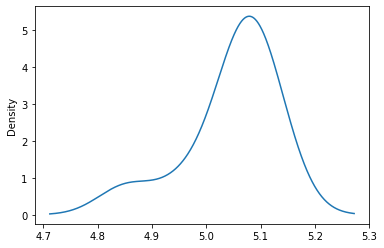

In [17]:
## Let's look at this visually with the kde plots/histograms

## Pandas Series are prolly the easiest way to simply get kde plots
w1_s = pd.Series(w1)
w1_s.plot.kde()

<AxesSubplot:ylabel='Density'>

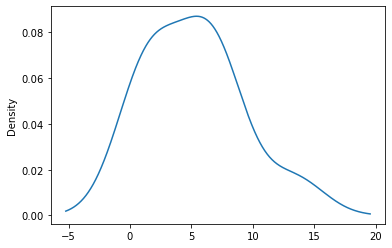

In [18]:
w2_s = pd.Series(w2)
w2_s.plot.kde()

In [19]:
## Lets see them together
w_df = pd.DataFrame({'w1': w1, 'w2': w2})

In [20]:
w_df.head()

,w1,w2
0,4.851912,7.316570
1,5.086983,1.613998
2,5.071021,5.880068
3,5.132268,2.130862
4,5.092818,0.964313


<AxesSubplot:ylabel='Density'>

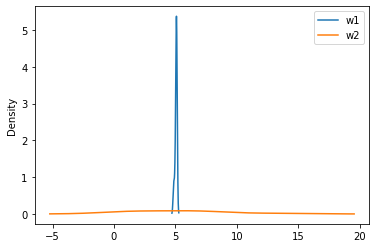

In [22]:
## We can immediately see their relative efficiency
w_df.plot.kde()

## Problem 19

__Beta-Binomial HDI__

In [30]:
## Helper function to plot Beta priors
def plot_beta_prior(a=1, b=1):
    x = np.linspace(0, 1, 1000)
    y = stats.beta.pdf(x, a, b)
    plt.plot(x, y, lw = 2.0, color='darkblue', alpha=0.8)
    plt.fill_between(x, y, facecolor='orange', alpha=0.5)
    plt.title(f"Beta({a},{b}) Prior Distribution")
    plt.show()

In [47]:
## Design the universe
θ = 0.75

In [130]:
## Observe a number of data points
N = 20

In [131]:
x = np.random.binomial(n=1, p=θ, size=N)

In [132]:
x[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [133]:
## Let's form the Bayesian prior (i.e. state the prior hyperparameters)
α = 4.0
β = 2.0

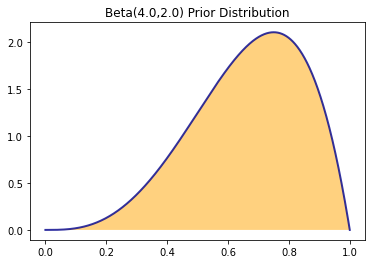

In [134]:
## Let's peak at her prior
plot_beta_prior(a=α, b=β)

In [135]:
## Let's use Bayes' Rule to update her beliefs after seeing the data

## NB: this is implicit in the beta-binom conjugate model
N1 = np.sum(x)
N0 = N - np.sum(x)

In [136]:
## Calculate the posterior hyperparameters
a_post = α + N1
b_post = β + N0

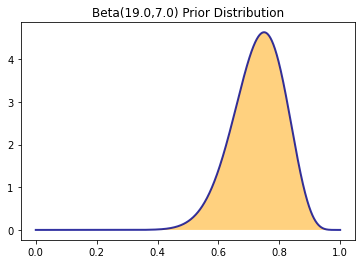

In [137]:
## Let's see the posterior
plot_beta_prior(a=a_post, b=b_post)

In [138]:
## The frequentist confidence coefficient
a = 0.10

In [139]:
## Calculate a Bayesian 90% Credibility Interval
lb = stats.beta(a_post, b_post).ppf(a/2.0)
ub = stats.beta(a_post, b_post).ppf(1.0 - a/2.0)

In [140]:
(lb, ub)

(0.580479992789974, 0.86052469342107)

Our probability statement: "Having seen the data, we believe there is a 90% probabiliy that the true theta
is between 0.6182 and 0.8167"

In [141]:
## Now let's act like Freq's and compare out 90% Confidence Interval

In [142]:
x̄ = np.mean(x)
x̄

0.75

In [143]:
## First, also estimate the std deviation
s = np.std(x, ddof=1)
s

0.4442616583193193

In [144]:
## Then form the std err
se = s / np.sqrt(N)

In [145]:
tc = stats.t(N-1).ppf(1.0 - a/2.0)
tc

1.729132811521367

In [146]:
ci_lb = x̄ - tc * se
ci_ub = x̄ + tc * se

# Get a tuple that represents the CI
(ci_lb, ci_ub)

(0.5782280731107823, 0.9217719268892177)

## A Bootstrap Confidence Interval

In [147]:
## 1. Let's reuse the $X \sim Exp(θ)$ problem from above

In [148]:
## This defines the population "true" parameter
θ = 5.0

In [158]:
## The number of Bootstrap iterations
B = 10_000

## The number of observations in each sample
N = 500

In [159]:
## Let's get our sample of data

x = np.random.exponential(scale=θ, size=N)

In [160]:
x[:10]

array([ 4.18891493, 10.91328472,  0.30898868, 14.67398149,  0.03925981,
        1.08256491,  1.85706123,  0.40713164, 13.4586179 ,  0.34650953])

In [161]:
## Let's use the mean to get an MLE 
x̄ = np.mean(x)
x̄

5.174451357607285

In [162]:
xbar_star = np.zeros(B)

for b in range(B):
    ## Instead of drawing from the true/unknown population model
    ## We will "bootstrap" by sampling with replacement from our sample
    x_star = np.random.choice(x, size=N, replace=True)
    
    ## Get the bootstrap mean
    xbar_star[b] = np.mean(x_star)

In [164]:
xbar_star.mean()

5.177786565527942

In [171]:
## Use the empirical CDF to get the quantiles

## Let's first starndardize the results
z_star = (xbar_star - xbar_star_bar) / xbar_star_se

## First make sure the data are sorted
z_star.sort()

In [172]:
z_star[:25]

array([-3.59679118, -3.51693825, -3.2864006 , -3.08815318, -3.01634424,
       -2.97930157, -2.97847169, -2.96354307, -2.93874013, -2.92917348,
       -2.90727961, -2.90299087, -2.86638502, -2.84716572, -2.81881222,
       -2.76333889, -2.75154466, -2.75047991, -2.74290234, -2.74053215,
       -2.73680477, -2.72926498, -2.71548574, -2.71423405, -2.70413848])

In [173]:
z_star.mean(), z_star.std(ddof=1)

(1.4551915228366853e-15, 1.0)

<AxesSubplot:ylabel='Density'>

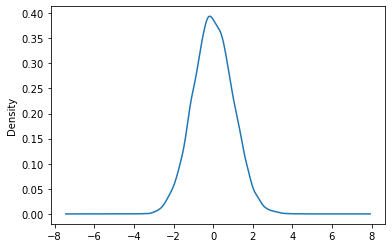

In [174]:
## The KDE plot should look like a std normal
z_star_s = pd.Series(z_star)
z_star_s.plot.kde()

In [177]:
a = .10
lb_c = z_star[int(a/2.0 * B)]
ub_c = z_star[int((1.0 - a/2.0) * B)]
lb_c, ub_c

(-1.634381024737294, 1.6573084770354678)

In [168]:
xbar_star_bar = xbar_star.mean()
xbar_star_se = xbar_star.std(ddof=1)

In [178]:
## Now we can state our bootstrap CI
(xbar_star_bar + lb_c * xbar_star_se, xbar_star_bar + ub_c * xbar_star_se)

(4.804937374050863, 5.555866166513339)

In [179]:
## Next step: compare this to a CLT CI and compare